<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/%5BESPEC%5D%20Fundamentos%20Aprendizagem%20M%C3%A1quina/T%C3%B3pico%2003%20-%20Aprendizado-Supervisionado%20-%20Arvores/T%C3%B3pico_03_Aprendizado_Supervisionado_Arvores_Decis%C3%A3o_Resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Árvores de Decisão
Neste tutorial, vamos explorar o algoritmo Árvore de Decisão utilizando a biblioteca scikit-learn. A Árvore de Decisão é um método de classificação que utiliza uma estrutura hierárquica de nós para tomar decisões a partir de atributos das amostras. O funcionamento do algoritmo se baseia na seleção dos melhores atributos para particionar o conjunto de dados de forma a maximizar o ganho de informação e, consequentemente, a reduzir a entropia dos dados.

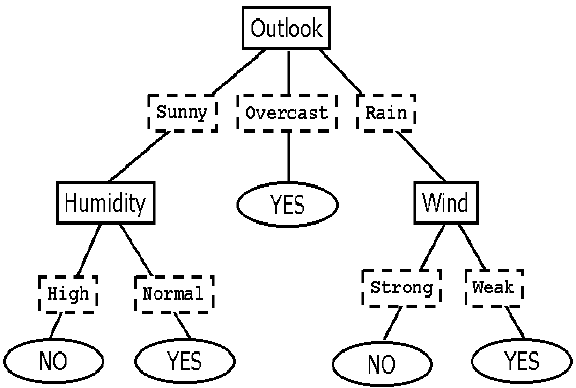

#Dataset

Aqui apresentamos alguns datasets para ilustrar árvores de decisão.
Você pode testar o pipeline de treino e teste para diferentes datasets:

*   Classificação de Vinhos
*   Cancer de Pulmão
*   Iris (Flores)



In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_diabetes
import pandas as pd
#Seed (Garante a reproducibilidade)
random_state = 9999

# carrega os dados do conjunto de dados iris
dataset = load_iris()
#dataset = load_wine()
##dataset = load_breast_cancer()


# converte os dados em um DataFrame do Pandas
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# adiciona a coluna de target
df['target'] = dataset.target

#Detalhamento dos tipos de dados
df.info()

#Shuffle e mostrar os primeiros 30 elementos
df.sample(frac=1).head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,1
94,11.62,1.99,2.28,18.0,98.0,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345.0,1
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510.0,2
107,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0,1
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0,2
40,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,0
56,14.22,1.70,2.30,16.3,118.0,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970.0,0
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678.0,1


#Holdout


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.data
y = dataset.target

print("Full: ", X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=random_state
)

print("Train: ", X_train.shape,y_train.shape)
print("Test: ", X_test.shape,y_test.shape)


Full:  (178, 13) (178,)
Train:  (119, 13) (119,)
Test:  (59, 13) (59,)


#Treinando o Modelo

Durante o treinamento de uma árvore de decisão, o algoritmo avalia os atributos de cada amostra e divide os dados em subgrupos mais homogêneos com base no atributo mais relevante. Esse processo é repetido recursivamente para cada subgrupo até que sejam alcançadas folhas puras, contendo apenas amostras de uma única classe. Para classificar uma nova amostra, basta percorrer a árvore seguindo as ramificações correspondentes aos valores de seus atributos até chegar a uma folha que indica a classe mais provável. Em resumo, a árvore de decisão cria uma estrutura de decisão em forma de árvore durante o treinamento e a usa posteriormente para classificar novas amostras

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Build a Gaussian Classifier
model = DecisionTreeClassifier()

# Model training
model.fit(X_train, y_train)

#Teste
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)

print(X_train,y_pred,y_train)
print("Train Accuracy:", accuracy)

[[1.358e+01 1.660e+00 2.360e+00 ... 1.090e+00 2.880e+00 1.515e+03]
 [1.378e+01 2.760e+00 2.300e+00 ... 7.000e-01 1.680e+00 6.150e+02]
 [1.208e+01 1.390e+00 2.500e+00 ... 9.300e-01 3.190e+00 3.850e+02]
 ...
 [1.141e+01 7.400e-01 2.500e+00 ... 1.100e+00 2.310e+00 4.340e+02]
 [1.243e+01 1.530e+00 2.290e+00 ... 6.900e-01 2.840e+00 3.520e+02]
 [1.216e+01 1.610e+00 2.310e+00 ... 1.330e+00 2.260e+00 4.950e+02]] [0 2 1 0 0 2 1 1 2 1 0 1 0 1 1 2 1 1 2 0 1 0 0 2 1 0 0 0 2 0 1 0 0 2 0 1 1
 1 2 1 2 1 0 2 2 1 2 1 1 0 2 1 1 2 1 2 0 1 2 1 2 1 1 0 2 2 0 1 1 1 2 0 1 1
 0 1 0 0 2 0 0 0 0 2 0 1 0 0 2 0 0 2 1 0 2 2 0 0 0 1 2 1 0 1 2 1 1 0 0 1 2
 2 1 0 1 0 1 1 1] [0 2 1 0 0 2 1 1 2 1 0 1 0 1 1 2 1 1 2 0 1 0 0 2 1 0 0 0 2 0 1 0 0 2 0 1 1
 1 2 1 2 1 0 2 2 1 2 1 1 0 2 1 1 2 1 2 0 1 2 1 2 1 1 0 2 2 0 1 1 1 2 0 1 1
 0 1 0 0 2 0 0 0 0 2 0 1 0 0 2 0 0 2 1 0 2 2 0 0 0 1 2 1 0 1 2 1 1 0 0 1 2
 2 1 0 1 0 1 1 1]
Train Accuracy: 1.0


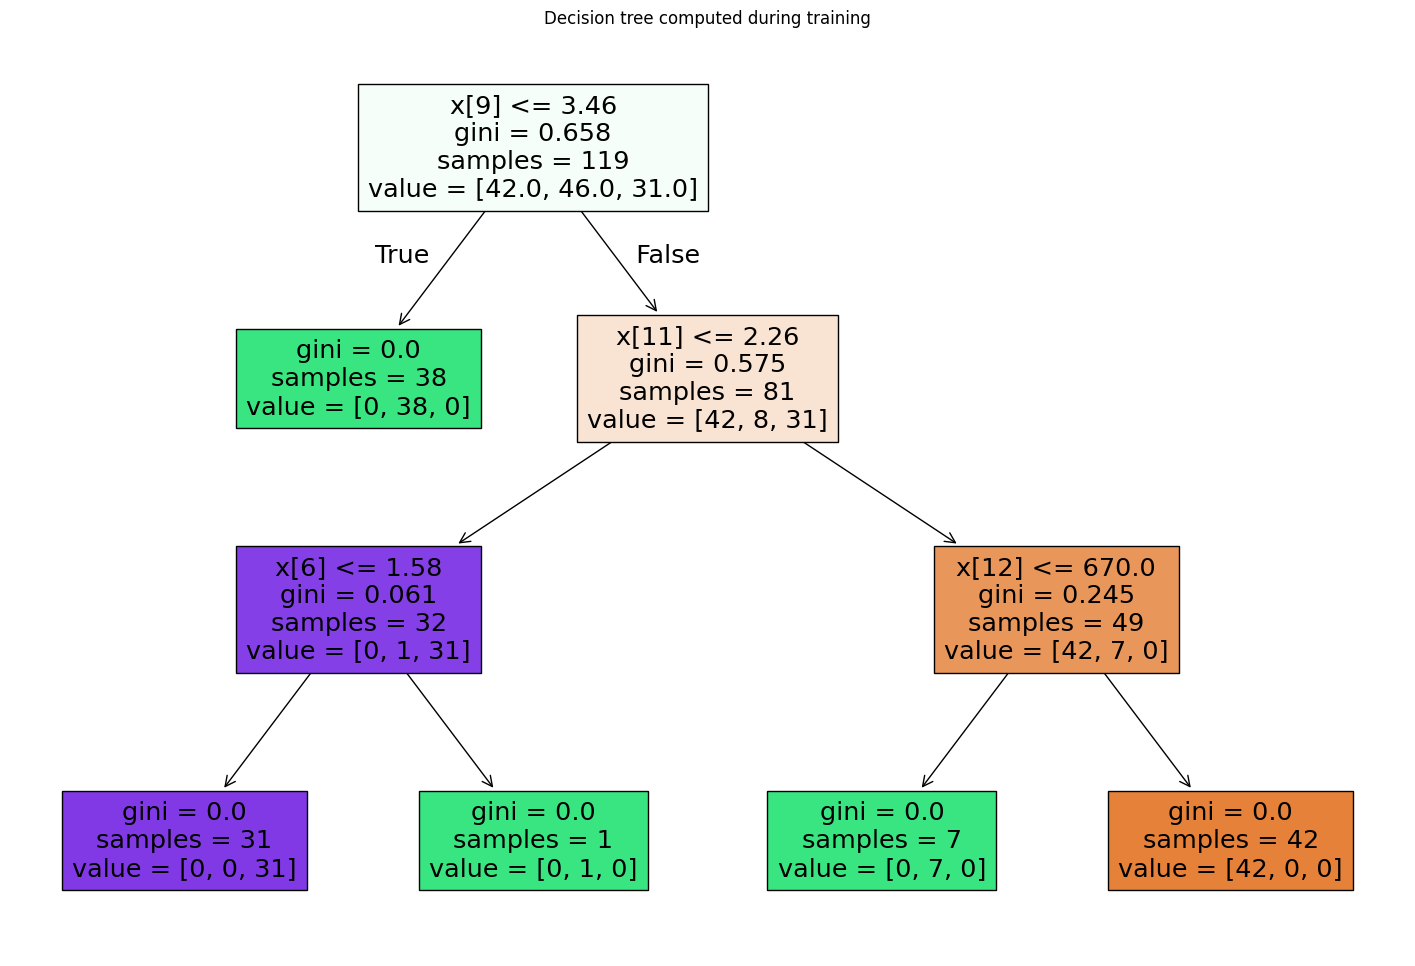

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plot_tree(model, filled=True)
plt.title("Decision tree computed during training")
plt.show()

#Testando

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.8983050847457628


#Análise dos Resultados

Analisando a acurácia do treino e teste, nota-se que o modelo generalizou o problema, ainda que com acurácia abaixo de 85%.

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      0.95      0.89        22
           2       0.88      0.88      0.88        17

    accuracy                           0.90        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.90      0.90        59



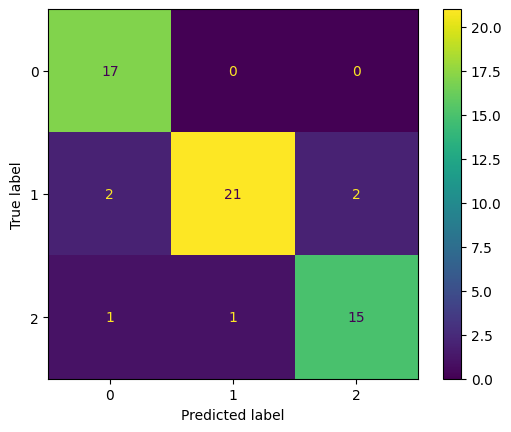

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Analisando Fronteiras de Decisão

Abaixo computamos com o auxilio do scikit-learn, as fronteiras de decisão, utilizando pares de váriaveis.

/tmp/ipython-input-728173117.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-728173117.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-728173117.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-728173117.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-728173117.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
/tmp/ipython-input-728173117.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


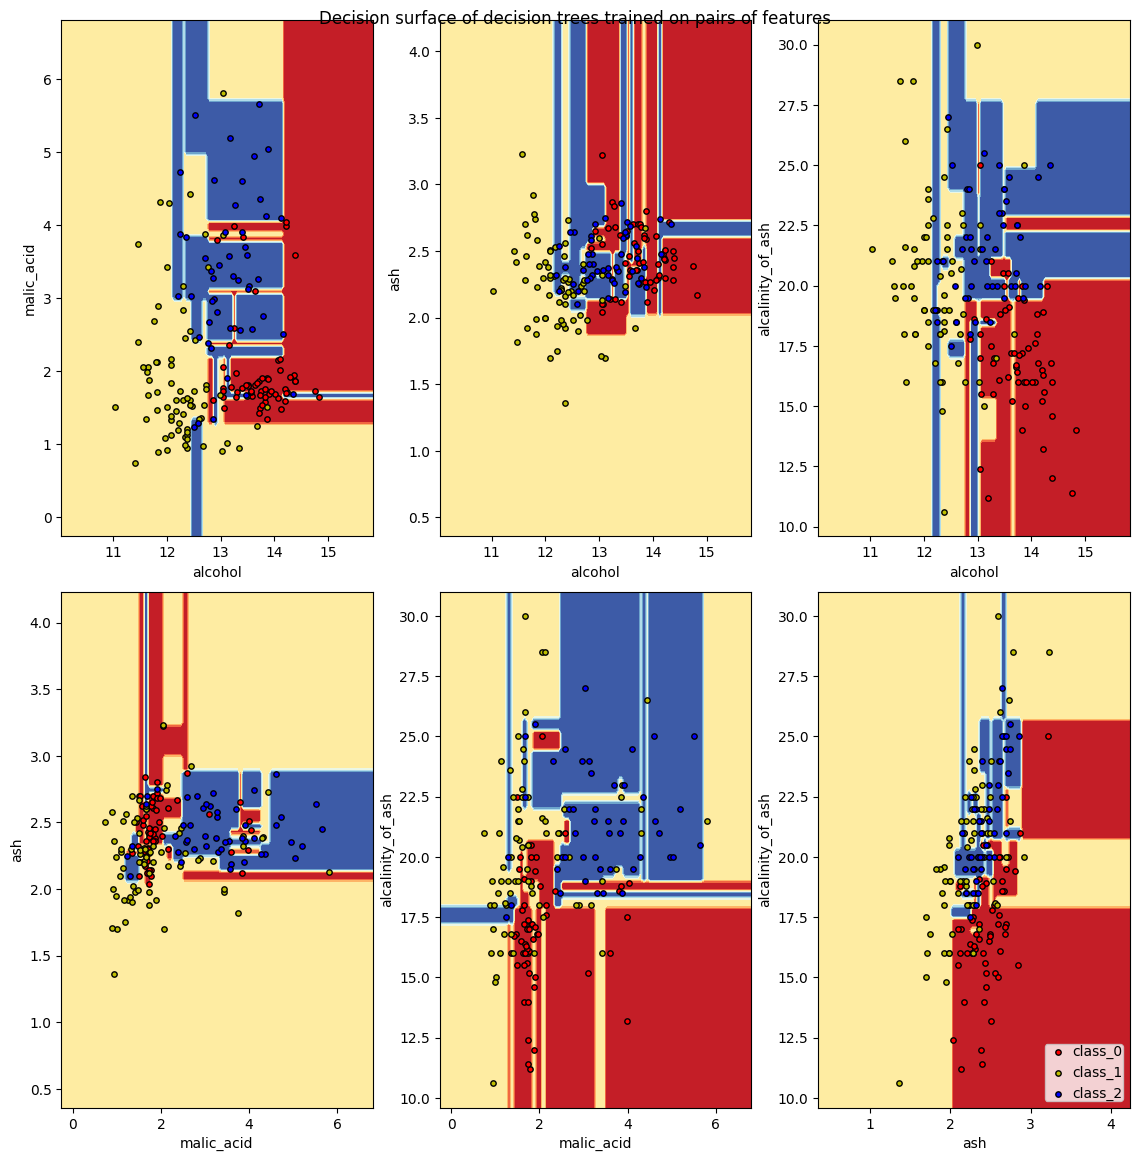

In [ ]:
import numpy as np


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = len(np.unique(y))
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(12,12))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    # We only take the two corresponding features
    X = dataset.data[:, pair]
    y = dataset.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=dataset.feature_names[pair[0]],
        ylabel=dataset.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=dataset.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

#Exercícios

Utilizando a função 'make_classification' para gerar datasets sintéticos, crie diferentes cenários e avalie o desempenho da árvore de decisao.

Considere:

* Aumentar o número de características
* Complexidade do dataset (Classes com overlap ou linearmente separaveis)

Avalie:
* Tempo de treino e teste
* Desepenho (Acurácia e Matriz de Confusão)
* Produza uma analise crítica



O Scikit-Learn e o Kaggle também possuem outras bases interessantes. Pesquise nos respectivos sites, bases de classificação e teste com os três modelos que já aprendemos (KNN, NAIVE BAYES e ÁRVORES)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors #cria as fronteiras de decisão aproximada (Não é usado para classificacao, apenas para interpolação do TSNE)
import time
import seaborn as sns

def evaluate_scenario(name, n_samples, n_features, n_classes, n_informative,
                      n_redundant, class_sep, flip_y, figsize=(6,6),random_state=42):
    print(f"\n===== Cenário: {name} =====")

    # Generate synthetic dataset
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        n_redundant=n_redundant,
        class_sep=class_sep,
        n_classes=n_classes,
        flip_y=flip_y,
        n_clusters_per_class=1,
        random_state=random_state
    )

    # Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=random_state
    )

    # ---- t-SNE Visualization BEFORE Classification ----
    tsne_pre = TSNE(n_components=2, learning_rate="auto", init="pca", perplexity=30)
    X_tsne_pre = tsne_pre.fit_transform(np.vstack([X_train, X_test]))

    X_train_tsne_pre = X_tsne_pre[:len(X_train)]
    X_test_tsne_pre  = X_tsne_pre[len(X_train):]

    plt.figure(figsize=figsize)
    plt.scatter(X_train_tsne_pre[:, 0], X_train_tsne_pre[:, 1],
                c=y_train, s=50, cmap=plt.cm.RdYlBu_r, alpha=0.7)
    plt.scatter(X_test_tsne_pre[:, 0], X_test_tsne_pre[:, 1],
                c=y_test, s=120, edgecolor="k", cmap=plt.cm.RdYlBu_r)
    plt.title(f"{name} — t-SNE Projection BEFORE Classification")
    plt.xlabel("t-SNE dim 1")
    plt.ylabel("t-SNE dim 2")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Train classifier
    t0 = time.time()
    clf = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train)
    train_time = time.time() - t0

    # Test
    t0 = time.time()
    y_pred = clf.predict(X_test)
    test_time = time.time() - t0

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"Dimensionalidade: {n_features} features")
    print(f"Acurácia: {acc:.4f}")
    print(f"Tempo de treino: {train_time:.6f} s")
    print(f"Tempo de teste:  {test_time:.6f} s")

    # ---- t-SNE Visualization AFTER Classification with Decision Frontiers ----
    tsne = TSNE(n_components=2, learning_rate="auto", init="pca", perplexity=30)
    X_tsne = tsne.fit_transform(np.vstack([X_train, X_test]))
    X_train_tsne = X_tsne[:len(X_train)]
    X_test_tsne  = X_tsne[len(X_train):]

    x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
    y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    nn = NearestNeighbors(n_neighbors=1).fit(X_tsne)
    _, idx = nn.kneighbors(grid)
    pred_grid = clf.predict(np.vstack([X_train, X_test])[idx[:, 0]])
    pred_grid = pred_grid.reshape(xx.shape)

    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, pred_grid, alpha=0.35, cmap=plt.cm.RdYlBu_r)
    scatter = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1],
                          c=y_test, edgecolor='k', s=120,
                          cmap=plt.cm.RdYlBu_r)
    plt.title(f"{name} — Decision Boundaries on t-SNE Projection")
    plt.xlabel("t-SNE dim 1")
    plt.ylabel("t-SNE dim 2")
    plt.legend()
    plt.colorbar(scatter)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Confusion Matrix Plot
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))


===== Cenário: C1 - Baixa Dimensionalidade / Separável =====


/tmp/ipython-input-2749934555.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


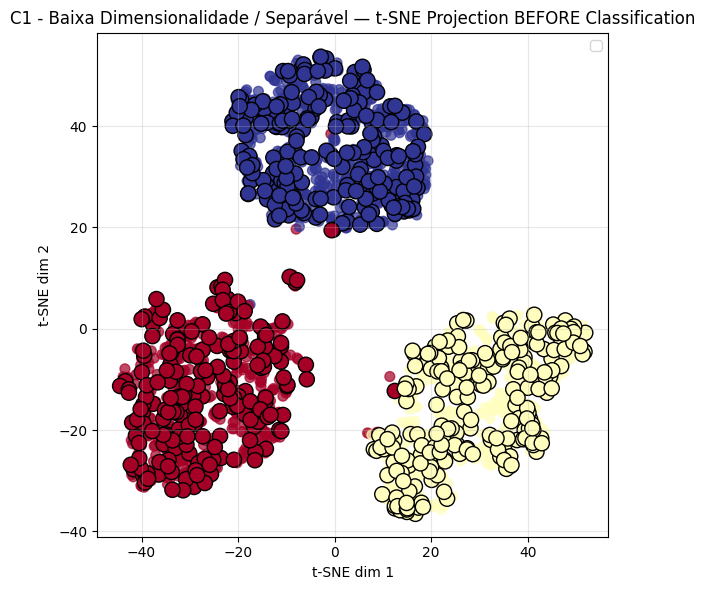

Dimensionalidade: 5 features
Acurácia: 0.9800
Tempo de treino: 0.011172 s
Tempo de teste:  0.000588 s


/tmp/ipython-input-2749934555.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


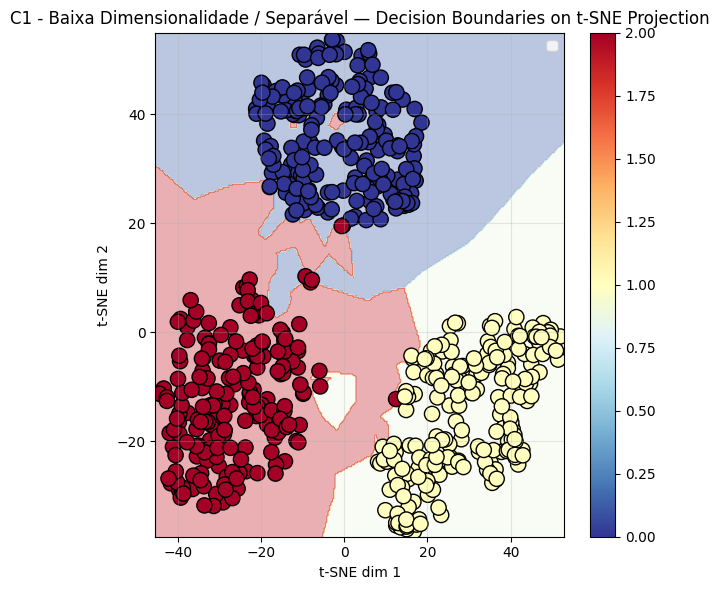

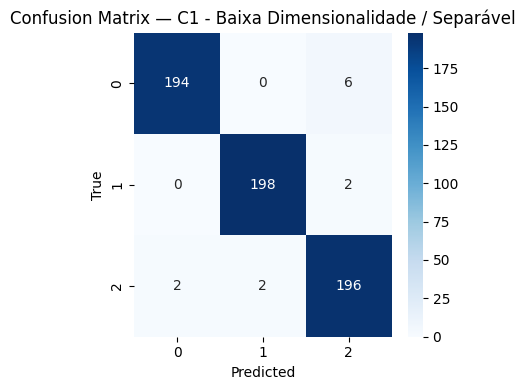


Classification Report:
              precision    recall  f1-score   support

           0     0.9898    0.9700    0.9798       200
           1     0.9900    0.9900    0.9900       200
           2     0.9608    0.9800    0.9703       200

    accuracy                         0.9800       600
   macro avg     0.9802    0.9800    0.9800       600
weighted avg     0.9802    0.9800    0.9800       600



In [ ]:
evaluate_scenario(
    name="C1 - Baixa Dimensionalidade / Separável",
    n_samples=2000,
    n_features=5,
    n_classes=3,
    n_informative=5,
    n_redundant=0,
    class_sep=2.0,
    flip_y=0.0
)


===== Cenário: C2 - Complexidade Moderada / Overlap Médio =====


/tmp/ipython-input-2749934555.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


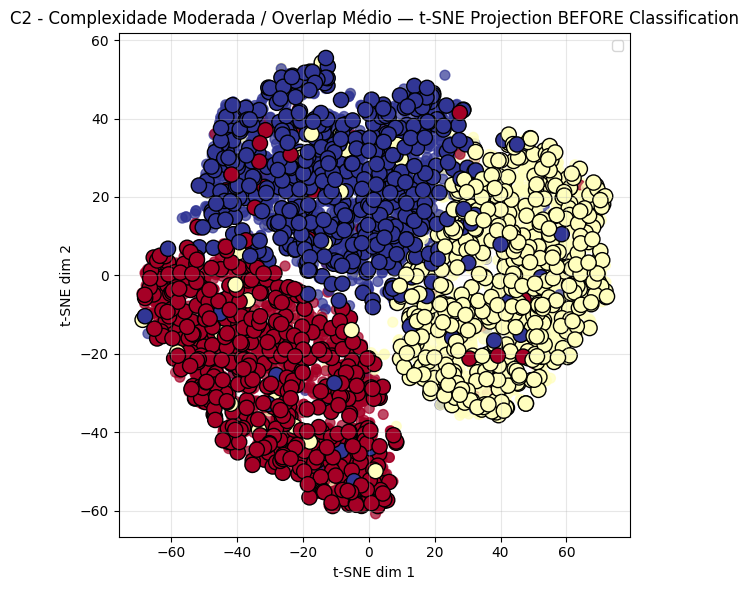

Dimensionalidade: 20 features
Acurácia: 0.8360
Tempo de treino: 0.185457 s
Tempo de teste:  0.000620 s


/tmp/ipython-input-2749934555.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


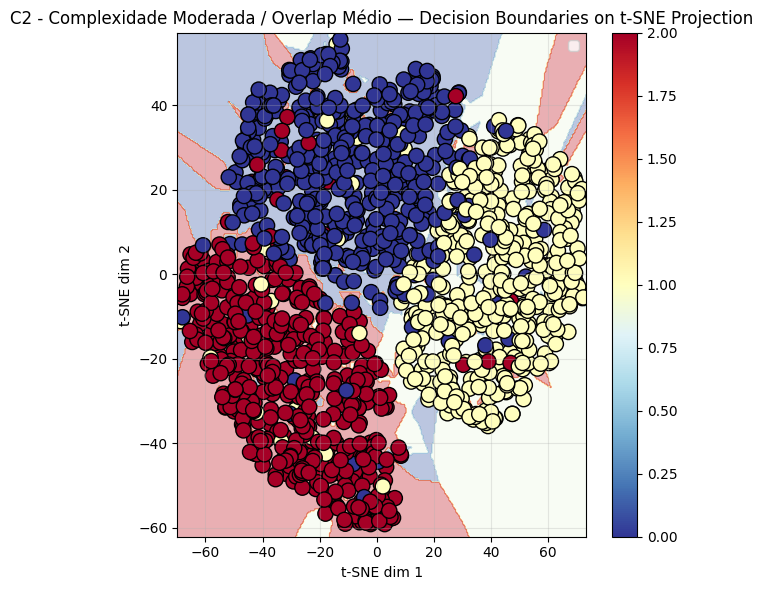

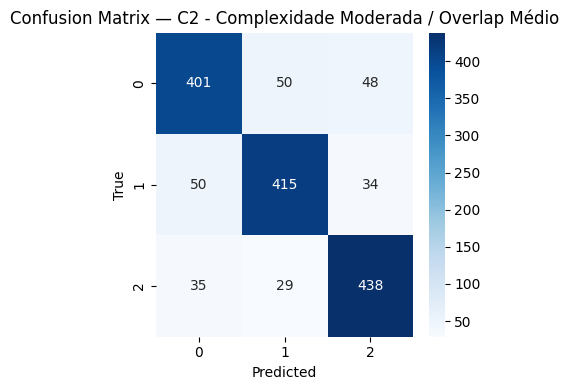


Classification Report:
              precision    recall  f1-score   support

           0     0.8251    0.8036    0.8142       499
           1     0.8401    0.8317    0.8359       499
           2     0.8423    0.8725    0.8571       502

    accuracy                         0.8360      1500
   macro avg     0.8358    0.8359    0.8357      1500
weighted avg     0.8358    0.8360    0.8358      1500



In [ ]:
evaluate_scenario(
    name="C2 - Complexidade Moderada / Overlap Médio",
    n_classes=3,
    n_samples=5000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    class_sep=1.0,
    flip_y=0.05
)




===== Cenário: C3 - Alta Dimensionalidade / Alto Overlap =====


/tmp/ipython-input-2749934555.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


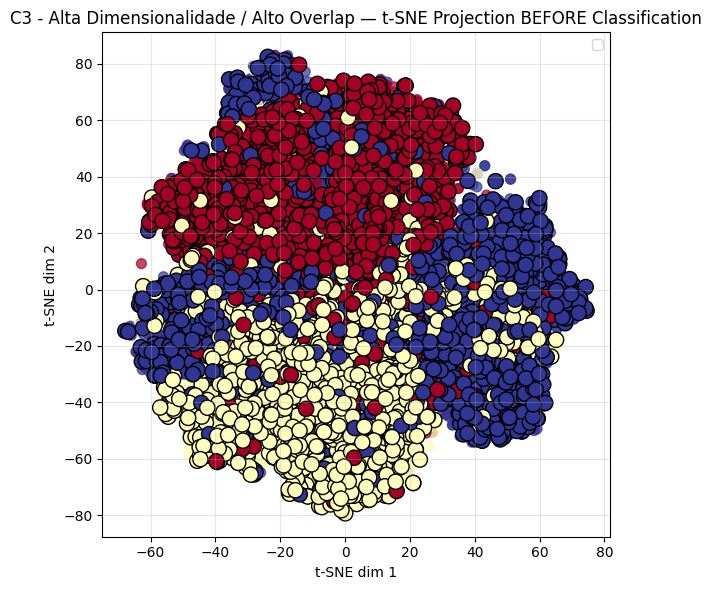

Dimensionalidade: 100 features
Acurácia: 0.6913
Tempo de treino: 2.162325 s
Tempo de teste:  0.001661 s


/tmp/ipython-input-2749934555.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


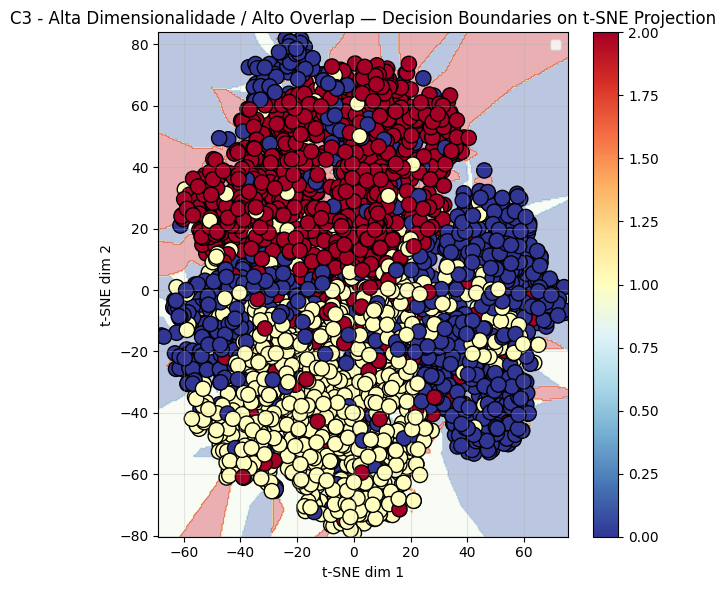

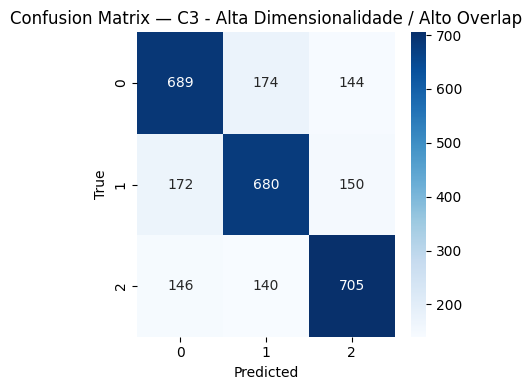


Classification Report:
              precision    recall  f1-score   support

           0     0.6842    0.6842    0.6842      1007
           1     0.6841    0.6786    0.6814      1002
           2     0.7057    0.7114    0.7085       991

    accuracy                         0.6913      3000
   macro avg     0.6913    0.6914    0.6914      3000
weighted avg     0.6913    0.6913    0.6913      3000



In [ ]:
evaluate_scenario(
    name="C3 - Alta Dimensionalidade / Alto Overlap",
    n_samples=10000,
    n_features=100,
    n_classes=3,
    n_informative=15,
    n_redundant=30,
    class_sep=0.5,
    flip_y=0.10
)